## Crypto Arbitrage

In this Challenge, you'll take on the role of an analyst at a high-tech investment firm. The vice president (VP) of your department is considering arbitrage opportunities in Bitcoin and other cryptocurrencies. As Bitcoin trades on markets across the globe, can you capitalize on simultaneous price dislocations in those markets by using the powers of Pandas?

For this assignment, you’ll sort through historical trade data for Bitcoin on two exchanges: Bitstamp and Coinbase. Your task is to apply the three phases of financial analysis to determine if any arbitrage opportunities exist for Bitcoin.

This aspect of the Challenge will consist of 3 phases.

1. Collect the data.

2. Prepare the data.

3. Analyze the data. 



###  Import the required libraries and dependencies.

In [28]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

To collect the data that you’ll need, complete the following steps:

Instructions. 

1. Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Using the Pandas `read_csv` function and the `Path` module, import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [29]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
# YOUR CODE HERE
bitstamp_csv_path = Path("Resources/bitstamp.csv")
bitstamp_df = pd.read_csv(bitstamp_csv_path, index_col="Timestamp", infer_datetime_format=True, parse_dates=True)


### Step 2: Use the `head` (and/or the `tail`) function to confirm that Pandas properly imported the data.

In [30]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
bitstamp_df.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [31]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
# YOUR CODE HERE
coinbase_csv_path = Path("Resources/coinbase.csv")
coinbase_df = pd.read_csv(coinbase_csv_path, index_col="Timestamp", infer_datetime_format=True, parse_dates=True)


In [32]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
# YOUR CODE HERE
coinbase_df.tail()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-03-31 23:55:00,6945.20,6948.06,6930.00,$6930.0,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,$6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,$6933.91,0.776431,5382.532162,6932.405747
2018-03-31 23:58:00,6933.91,6938.00,6933.90,$6937.31,0.133413,925.356547,6936.048538
2018-03-31 23:59:00,6937.30,6937.30,6931.09,$6934.0,1.012720,7022.275088,6934.070316


## Prepare the Data

To prepare and clean your data for analysis, complete the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [33]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
# YOUR CODE HERE
bitstamp_df = bitstamp_df.dropna().copy()

### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [34]:
# Use the str.replace function to remove the dollar sign, $
# YOUR CODE HERE
bitstamp_df["Close"] = bitstamp_df["Close"].str.replace("$", "", regex=False)
bitstamp_df["Close"]

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00     13620.0
                         ...   
2018-03-31 23:55:00     6922.56
2018-03-31 23:56:00     6920.32
2018-03-31 23:57:00     6934.72
2018-03-31 23:58:00     6927.65
2018-03-31 23:59:00     6928.01
Name: Close, Length: 129067, dtype: object

### Step 3: Convert the data type of the Close column to a `float`.

In [35]:
# Convert the Close data type to a float
# YOUR CODE HERE
bitstamp_df["Close"] = bitstamp_df["Close"].astype("float")
bitstamp_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129067 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129067 non-null  float64
 1   High            129067 non-null  float64
 2   Low             129067 non-null  float64
 3   Close           129067 non-null  float64
 4   BTC Volume      129067 non-null  float64
 5   USD Volume      129067 non-null  float64
 6   Weighted Price  129067 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [36]:
# Review the data for duplicate values, and drop them if necessary
# YOUR CODE HERE
bitstamp_df.duplicated()
bitstamp_df = bitstamp_df.drop_duplicates().copy()
bitstamp_df.duplicated()

Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129067, dtype: bool

### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [37]:
# Repeat Steps 1–4 for the coinbase DataFrame
# YOUR CODE HERE
#1
coinbase_df = coinbase_df.dropna().copy()
#2
coinbase_df["Close"] = coinbase_df["Close"].str.replace("$", "", regex=False)
coinbase_df["Close"]
#3
coinbase_df["Close"] = coinbase_df["Close"].astype("float")
coinbase_df.info()
#4
coinbase_df.duplicated()
coinbase_df = coinbase_df.drop_duplicates().copy()
coinbase_df.duplicated()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 129322 entries, 2018-01-01 00:00:00 to 2018-03-31 23:59:00
Data columns (total 7 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open            129322 non-null  float64
 1   High            129322 non-null  float64
 2   Low             129322 non-null  float64
 3   Close           129322 non-null  float64
 4   BTC Volume      129322 non-null  float64
 5   USD Volume      129322 non-null  float64
 6   Weighted Price  129322 non-null  float64
dtypes: float64(7)
memory usage: 7.9 MB


Timestamp
2018-01-01 00:00:00    False
2018-01-01 00:01:00    False
2018-01-01 00:02:00    False
2018-01-01 00:03:00    False
2018-01-01 00:04:00    False
                       ...  
2018-03-31 23:55:00    False
2018-03-31 23:56:00    False
2018-03-31 23:57:00    False
2018-03-31 23:58:00    False
2018-03-31 23:59:00    False
Length: 129322, dtype: bool

## Analyze the Data

Your analysis consists of the following tasks: 

1. Choose the columns of data on which to focus your analysis.

2. Get the summary statistics and plot the data.

3. Focus your analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus your analysis.

Select the data you want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [38]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced = bitstamp_df.loc[:,['Close']]

# Review the first five rows of the DataFrame
# YOUR CODE HERE
bitstamp_sliced.head()

,Close
Timestamp,
2018-01-01 00:00:00,13646.48
2018-01-01 00:01:00,13658.75
2018-01-01 00:02:00,13610.22
2018-01-01 00:03:00,13639.09
2018-01-01 00:04:00,13620.00


In [40]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced = coinbase_df.iloc[:,[3]]

# Review the first five rows of the DataFrame
# YOUR CODE HERE
coinbase_sliced.head()


,Close
Timestamp,
2018-01-01 00:00:00,13608.49
2018-01-01 00:01:00,13601.66
2018-01-01 00:02:00,13580.00
2018-01-01 00:03:00,13550.34
2018-01-01 00:04:00,13583.44


### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. To do so, complete the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. Be sure to tailor the figure size, title, and color to each visualization.

3. In one plot, overlay the visualizations that you created in Step 2 for bitstamp and coinbase. Be sure to adjust the legend and title for this new visualization.

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. Your goal is to evaluate how the spread between the two exchanges changed across the time period that the datasets define. Did the degree of spread change as time progressed?

In [41]:
# Generate the summary statistics for the bitstamp DataFrame
# YOUR CODE HERE
bitstamp_sliced.describe(include='all')

,Close
count,129067.000000
mean,10459.842453
std,2315.976088
min,5944.000000
25%,8613.370000
50%,10145.950000
75%,11444.810000
max,17234.980000


In [42]:
# Generate the summary statistics for the coinbase DataFrame
# YOUR CODE HERE
coinbase_sliced.describe(include='all')

,Close
count,129322.000000
mean,10449.140958
std,2317.197419
min,5882.310000
25%,8609.230000
50%,10137.440000
75%,11397.237500
max,17177.990000


<AxesSubplot:title={'center':'Bitstamp Closing Prices'}, xlabel='Timestamp'>

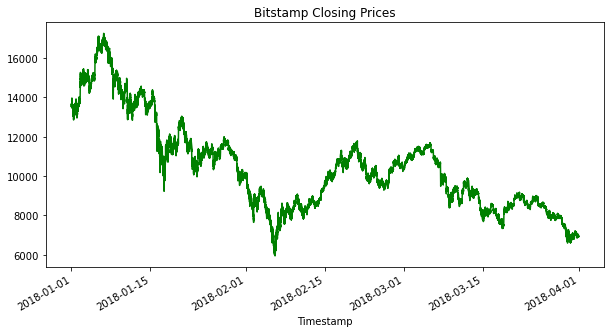

In [43]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
bitstamp_sliced["Close"].plot(figsize=(10,5), title="Bitstamp Closing Prices", color="green")

<AxesSubplot:title={'center':'Coinbase Closing Prices'}, xlabel='Timestamp'>

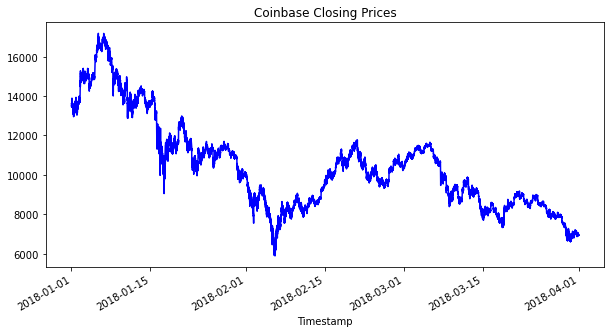

In [44]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
# YOUR CODE HERE
coinbase_sliced["Close"].plot(figsize=(10,5), title="Coinbase Closing Prices", color="blue")

<AxesSubplot:title={'center':'Bitstamp v. Coinbase'}, xlabel='Timestamp'>

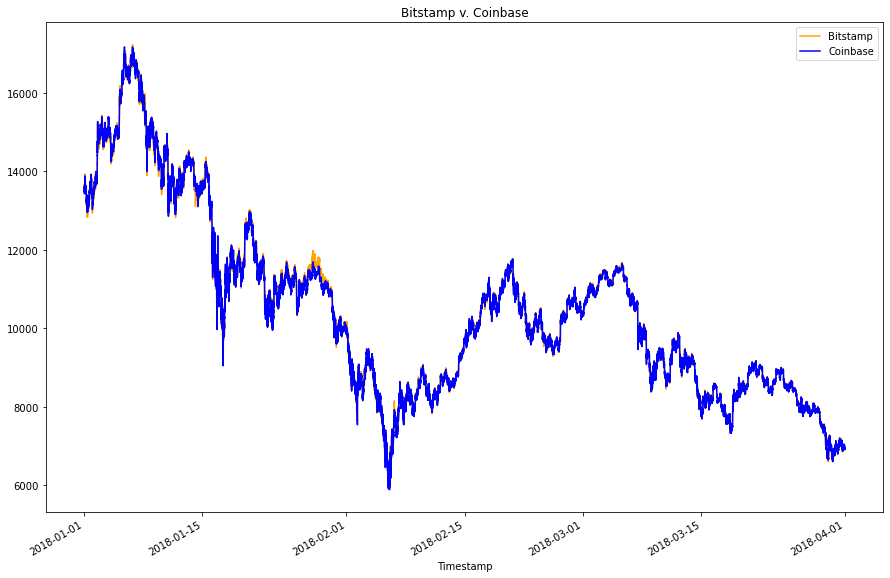

In [47]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_sliced["Close"].plot(legend=True, figsize=(15,10), title="Bitstamp v. Coinbase", color="orange", label = "Bitstamp")
coinbase_sliced["Close"].plot(legend=True, figsize=(15,10), color="blue", label="Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (Jan, 2018)'}, xlabel='Timestamp'>

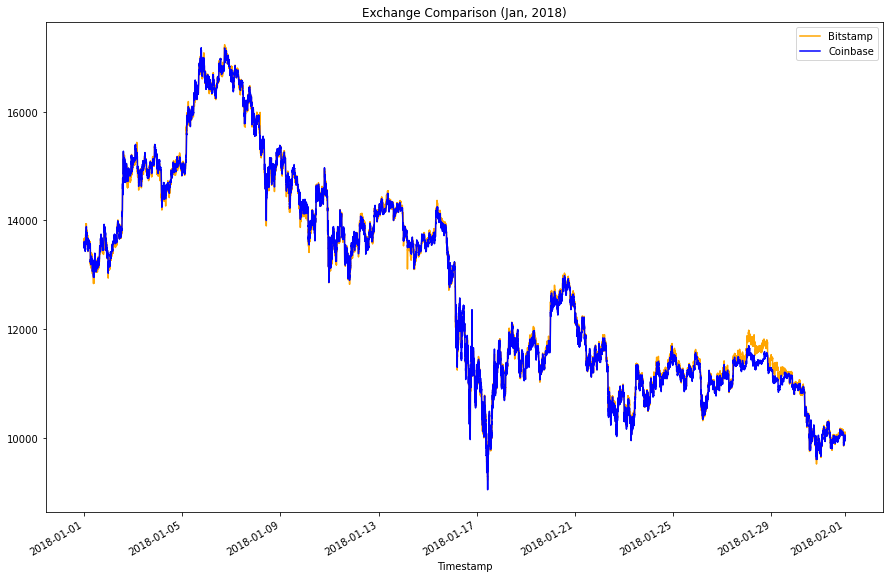

In [106]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
# YOUR CODE HERE
bitstamp_df["Close"].loc["2018-01-01":"2018-01-31"].plot(legend=True, figsize=(15,10), title="Exchange Comparison (Jan, 2018)", color="orange", label = "Bitstamp")
coinbase_df["Close"].loc["2018-01-01":"2018-01-31"].plot(legend=True, figsize=(15,10), color="blue", label = "Coinbase")

<AxesSubplot:title={'center':'Exchange Comparison (March, 2018)'}, xlabel='Timestamp'>

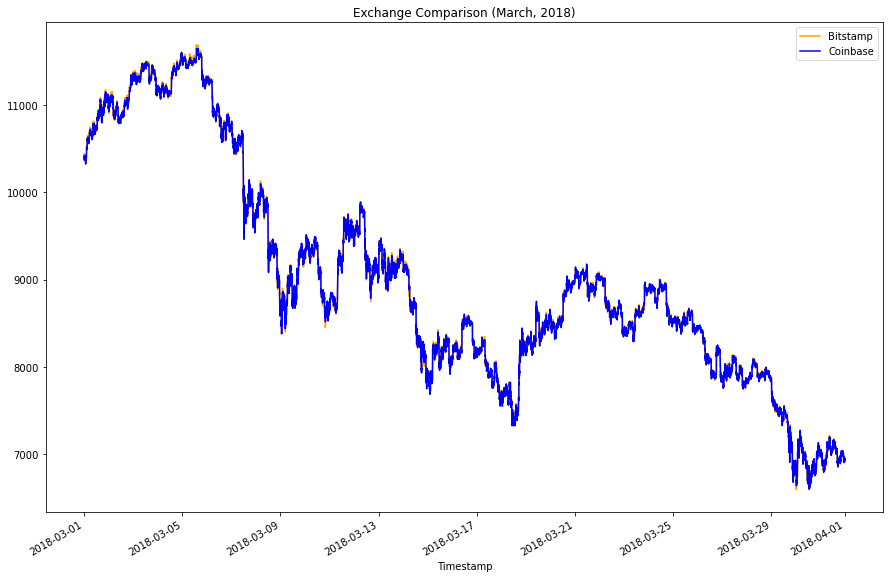

In [107]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
# YOUR CODE HERE
bitstamp_df["Close"].loc["2018-03-01":"2018-03-31"].plot(legend=True, figsize=(15,10), color="orange", title="Exchange Comparison (March, 2018)", label = "Bitstamp")
coinbase_df["Close"].loc["2018-03-01":"2018-03-31"].plot(legend=True, figsize=(15,10), color="blue", label='Coinbase')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, the graphic shows that the degree of spread has been declining as time progresses.  

### Step 3: Focus Your Analysis on Specific Dates

Focus your analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. Choose one date that’s early in the dataset, one from the middle of the dataset, and one from the later part of the time period.

2. For each of the three dates, generate the summary statistics and then create a box plot. This big-picture view is meant to help you gain a better understanding of the data before you perform your arbitrage calculations. As you compare the data, what conclusions can you draw?

<AxesSubplot:title={'center':'Jan 15th, 2018'}, xlabel='Timestamp'>

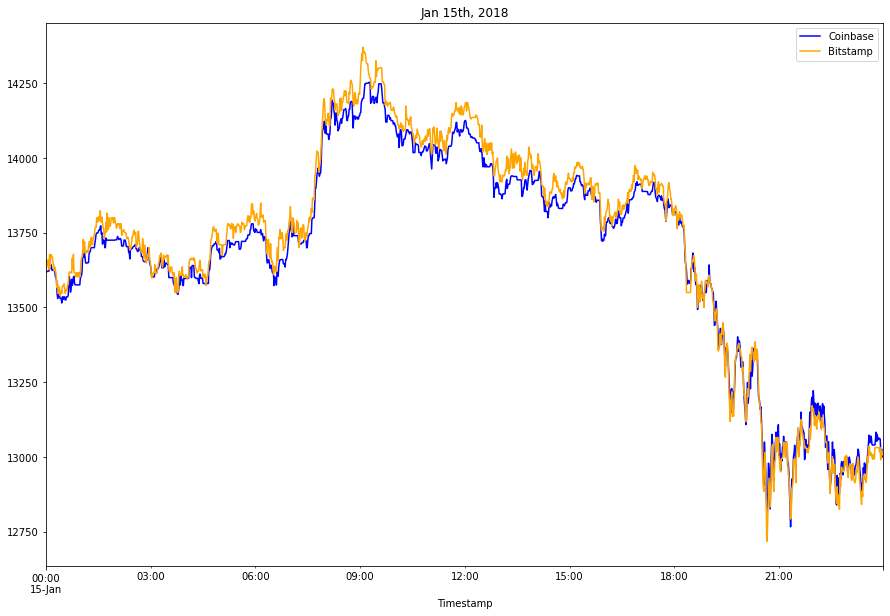

In [123]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
coinbase_df["Close"].loc["2018-01-15"].plot(legend=True, figsize=(15,10), color="blue", label="Coinbase", title="Jan 15th, 2018")
bitstamp_df["Close"].loc["2018-01-15"].plot(legend=True, figsize=(15,10), color="orange", label = "Bitstamp")

In [126]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# YOUR CODE HERE
arbitrage_spread_early = coinbase_df["Close"].loc["2018-01-15":"2018-01-16"] - bitstamp_df["Close"].loc["2018-01-16":"2018-01-16"]

# Generate summary statistics for the early DataFrame
# YOUR CODE HERE
arbitrage_spread_early.describe()

count    1419.000000
mean       23.212135
std        67.789186
min      -275.920000
25%        -8.330000
50%        22.280000
75%        52.355000
max       606.800000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Early Date'}>

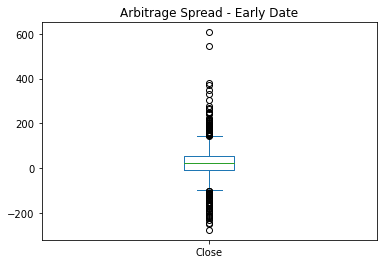

In [127]:
# Visualize the arbitrage spread from early in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_early.plot(kind='box',  title="Arbitrage Spread - Early Date")

<AxesSubplot:title={'center':'Feb 24th, 2018'}, xlabel='Timestamp'>

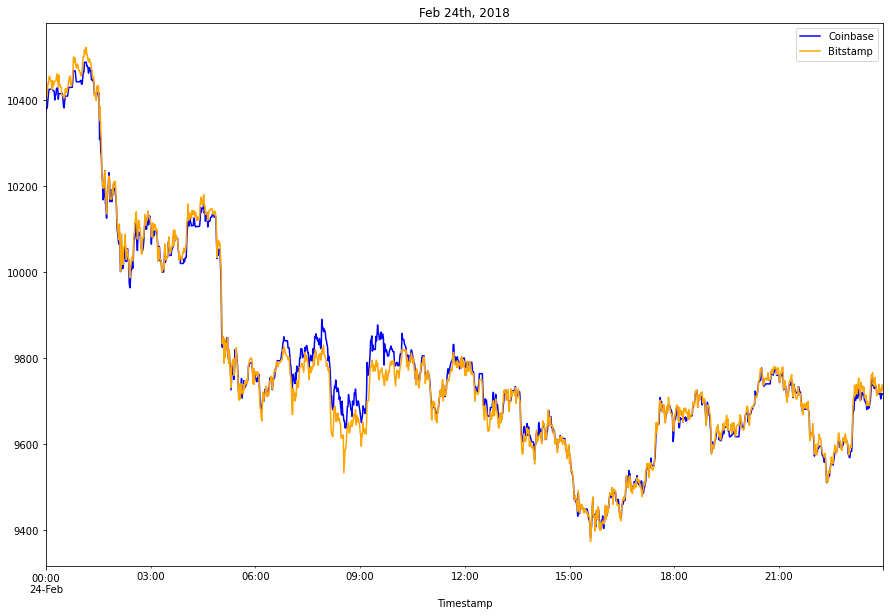

In [128]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
coinbase_df["Close"].loc["2018-02-24"].plot(legend=True, figsize=(15,10), color="blue", label="Coinbase" , title="Feb 24th, 2018")
bitstamp_df["Close"].loc["2018-02-24"].plot(legend=True, figsize=(15,10), color="orange", label = "Bitstamp")

In [129]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# YOUR CODE HERE
arbitrage_spread_middle = coinbase_df["Close"].loc["2018-02-24"] - bitstamp_df["Close"].loc["2018-02-24"]

# Generate summary statistics 
# YOUR CODE HERE
arbitrage_spread_middle.describe()

count    1437.000000
mean        3.396131
std        22.969472
min       -50.180000
25%       -10.590000
50%        -0.010000
75%        12.120000
max       121.320000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Middle Date'}>

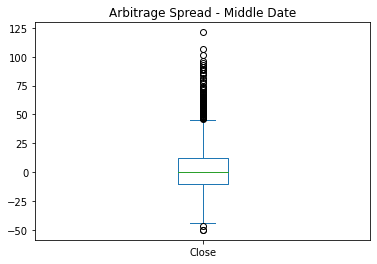

In [130]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_middle.plot(kind='box', title='Arbitrage Spread - Middle Date')

<AxesSubplot:title={'center':'Mar 26th, 2018'}, xlabel='Timestamp'>

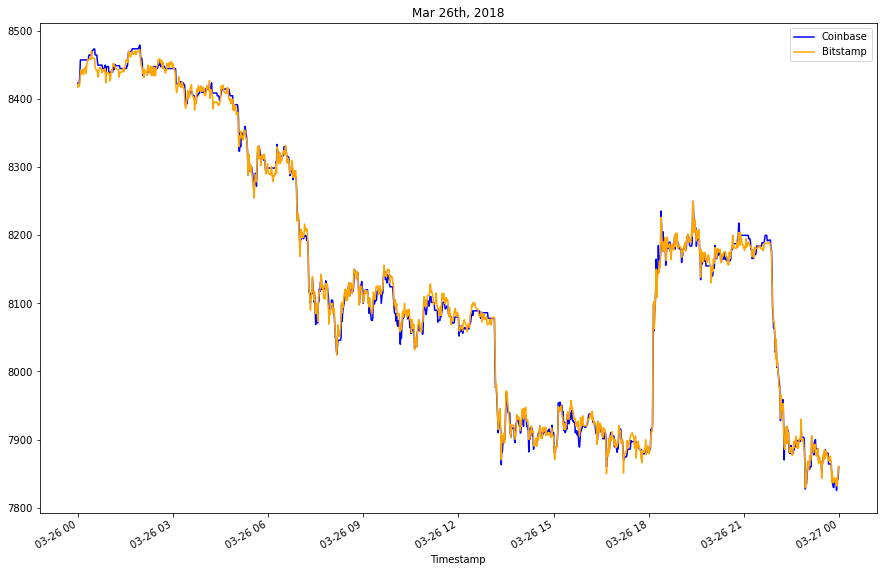

In [131]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
# YOUR CODE HERE
coinbase_df["Close"].loc["2018-03-26"].plot(legend=True, figsize=(15,10), color="blue", label="Coinbase", title="Mar 26th, 2018",)
bitstamp_df["Close"].loc["2018-03-26"].plot(legend=True, figsize=(15,10), color="orange", label = "Bitstamp")

In [132]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
# YOUR CODE HERE
arbitrage_spread_late = coinbase_df["Close"].loc["2018-03-26"] - bitstamp_df["Close"].loc["2018-03-26"]

# Generate summary statistics for the late DataFrame
# YOUR CODE HERE
arbitrage_spread_late.describe()

count    1432.000000
mean       -0.722193
std         8.523060
min       -32.040000
25%        -6.812500
50%        -0.730000
75%         4.965000
max        35.070000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Arbitrage Spread - Late Date'}>

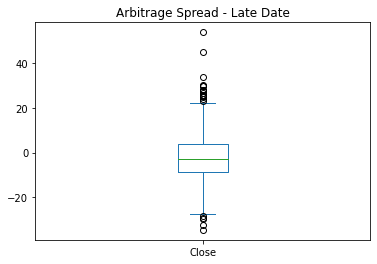

In [62]:
# Visualize the arbitrage spread from late in the dataset in a box plot
# YOUR CODE HERE
arbitrage_spread_late.plot(kind="box", title="Arbitrage Spread - Late Date")

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date that you selected in the previous section. Your goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. Complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

(NOTE: The starter code displays only one date. You'll want to do this analysis for two additional dates).

#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [136]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early_2 = coinbase_df["Close"].loc["2018-01-15":"2018-01-16"] - bitstamp_df["Close"].loc["2018-01-16":"2018-01-16"]
arbitrage_spread_early_2 = arbitrage_spread_early_2[arbitrage_spread_early_2 > 0]
print(arbitrage_spread_early_2.describe())

arbitrage_spread_middle_2 = coinbase_df["Close"].loc["2018-02-24"] - bitstamp_df["Close"].loc["2018-02-24"]
arbitrage_spread_middle_2 = arbitrage_spread_middle_2[arbitrage_spread_middle_2 > 0]
print(arbitrage_spread_middle_2.describe())

arbitrage_spread_late_2 = bitstamp_df["Close"].loc["2018-03-26"] - coinbase_df["Close"].loc["2018-03-26"]
arbitrage_spread_late_2 = arbitrage_spread_late[arbitrage_spread_late > 0]
print(arbitrage_spread_late_2.describe())


count    960.000000
mean      53.405344
std       53.910409
min        0.010000
25%       21.602500
50%       39.885000
75%       68.547500
max      606.800000
Name: Close, dtype: float64
count    713.000000
mean      19.880351
std       20.699851
min        0.010000
25%        5.040000
50%       12.330000
75%       27.250000
max      121.320000
Name: Close, dtype: float64
count    651.000000
mean       6.689247
std        5.240159
min        0.010000
25%        2.835000
50%        5.230000
75%        9.195000
max       35.070000
Name: Close, dtype: float64


#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [137]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
# YOUR CODE HERE
spread_return_early= arbitrage_spread_early_2/bitstamp_df["Close"].loc["2018-01-16"]
spread_return_middle= arbitrage_spread_middle_2/bitstamp_df["Close"].loc["2018-02-24"]
spread_return_late= arbitrage_spread_late_2/coinbase_df["Close"].loc["2018-03-26"]
#My dates do not satisface the requerimwnt so I'll change the dates from now on


# Review the spread return DataFrame
# YOUR CODE HERE
display(spread_return_early.head())
display(spread_return_middle.head())
display(spread_return_late.head())

Timestamp
2018-01-16 00:00:00         NaN
2018-01-16 00:01:00         NaN
2018-01-16 00:02:00    0.000731
2018-01-16 00:03:00    0.001108
2018-01-16 00:04:00    0.000909
Name: Close, dtype: float64

Timestamp
2018-02-24 00:00:00   NaN
2018-02-24 00:01:00   NaN
2018-02-24 00:02:00   NaN
2018-02-24 00:03:00   NaN
2018-02-24 00:04:00   NaN
Name: Close, dtype: float64

Timestamp
2018-03-26 00:00:00    0.000737
2018-03-26 00:01:00    0.000122
2018-03-26 00:02:00    0.000470
2018-03-26 00:03:00    0.000576
2018-03-26 00:04:00    0.001393
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [138]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
# YOUR CODE HERE
profitable_trades_early = spread_return_early[spread_return_early > .01]
profitable_trades_mid = spread_return_middle[spread_return_middle > .01]
profitable_trades_late = spread_return_late[spread_return_late > .01]

# Review the first five profitable trades
# YOUR CODE HERE
display(profitable_trades_early.head(10))
display(profitable_trades_mid.head(10))
display(profitable_trades_late.head(10))

Timestamp
2018-01-16 02:56:00    0.012962
2018-01-16 02:57:00    0.010838
2018-01-16 02:59:00    0.014171
2018-01-16 03:00:00    0.010675
2018-01-16 03:06:00    0.019704
2018-01-16 03:08:00    0.017190
2018-01-16 03:09:00    0.022272
2018-01-16 03:10:00    0.012113
2018-01-16 03:13:00    0.012448
2018-01-16 03:37:00    0.022270
Name: Close, dtype: float64

Timestamp
2018-02-24 08:32:00    0.012726
2018-02-24 09:32:00    0.010974
2018-02-24 09:39:00    0.010431
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [139]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
# YOUR CODE HERE
profitable_trades_early.describe()
profitable_trades_mid.describe()
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [144]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
# YOUR CODE HERE
profit_early = profitable_trades_early * bitstamp_df["Close"].loc["2018-01-16"]
profit_early.head()

profit_mid = profitable_trades_mid * bitstamp_df["Close"].loc["2018-02-24"]
profit_mid.head()

profit_late = profitable_trades_late * coinbase_df["Close"].loc["2018-03-26"]
profit_late.head()

# Drop any missing values from the profit DataFrame
# YOUR CODE HERE
profit_per_trade_early = profit_early.dropna()
profit_per_trade_mid = profit_mid.dropna()
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
# YOUR CODE HERE
display(profit_per_trade_early)
display(profit_per_trade_mid)
display(profit_per_trade_late)

Timestamp
2018-01-16 02:56:00    162.01
2018-01-16 02:57:00    135.00
2018-01-16 02:59:00    176.13
2018-01-16 03:00:00    134.01
2018-01-16 03:06:00    241.54
                        ...  
2018-01-16 19:23:00    125.09
2018-01-16 19:26:00    131.78
2018-01-16 19:38:00    124.01
2018-01-16 19:48:00    117.63
2018-01-16 20:07:00    113.69
Name: Close, Length: 73, dtype: float64

Timestamp
2018-02-24 08:32:00    121.32
2018-02-24 09:32:00    107.00
2018-02-24 09:39:00    101.75
Name: Close, dtype: float64

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

In [145]:
# Generate the summary statistics for the early profit per trade DataFrame
# YOUR CODE HERE
print(profit_per_trade_early.describe())
print(profit_per_trade_mid.describe())
print(profit_per_trade_late.describe())

count     73.000000
mean     193.796849
std       88.701429
min      112.520000
25%      139.420000
50%      171.310000
75%      210.060000
max      606.800000
Name: Close, dtype: float64
count      3.000000
mean     110.023333
std       10.129246
min      101.750000
25%      104.375000
50%      107.000000
75%      114.160000
max      121.320000
Name: Close, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64


<AxesSubplot:title={'center':'Profit Per Trade - Jan 16, 2018'}, xlabel='Timestamp'>

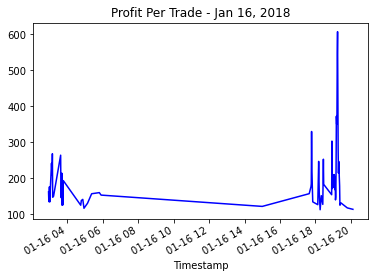

In [150]:
# Plot the results for the early profit per trade DataFrame
# YOUR CODE HERE
profit_per_trade_early.plot(color='blue', title="Profit Per Trade - Jan 16, 2018")

<AxesSubplot:title={'center':'Profit Per Trade - Feb 24th, 2018'}, xlabel='Timestamp'>

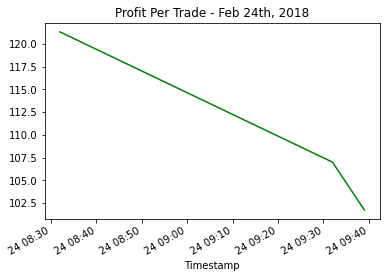

In [151]:
profit_per_trade_mid.plot(color='green', title="Profit Per Trade - Feb 24th, 2018")

<AxesSubplot:title={'center':'Profit Per Trade - March th, 2018'}, xlabel='Timestamp'>

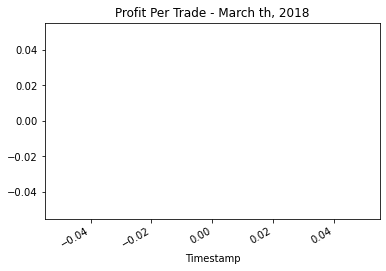

In [152]:
profit_per_trade_late.plot(color='orange', title="Profit Per Trade - March th, 2018")

#### 7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [155]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
# YOUR CODE HERE
profit_early = profit_per_trade_early.sum()
display(profit_early)

profit_mid = profit_per_trade_mid.sum()
display(profit_mid)

profit_late = profit_per_trade_late.sum()
display(profit_late)

14147.169999999998

330.0699999999997

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [158]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_middle = profit_per_trade_mid.cumsum()
cumulative_profit_late = profit_per_trade_late.cumsum()


<AxesSubplot:title={'center':'Cumulative Sum -  Early Date'}, xlabel='Timestamp'>

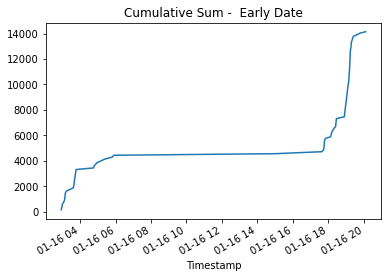

In [159]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
# YOUR CODE HERE
cumulative_profit_early.plot(title="Cumulative Sum -  Early Date")

<AxesSubplot:title={'center':'Cumulative Sum -  Middle Date'}, xlabel='Timestamp'>

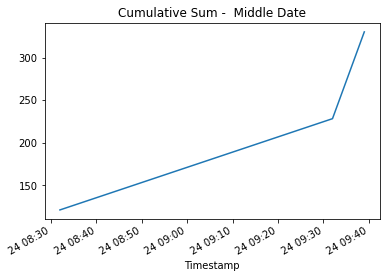

In [160]:
cumulative_profit_middle.plot(title="Cumulative Sum -  Middle Date")

<AxesSubplot:title={'center':'Cumulative Sum -  Late Date'}, xlabel='Timestamp'>

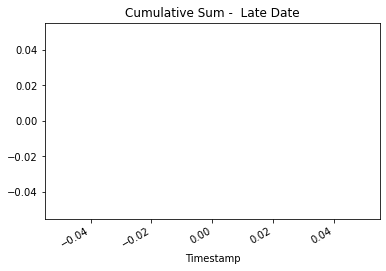

In [161]:
cumulative_profit_late.plot(title="Cumulative Sum -  Late Date")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** The graphics show that most of the profit was generated during the last moments of the day.